# Mutual Information analysis

In [1]:
import pandas as pd


In [5]:
df = pd.read_csv('sample_data.csv')

In [6]:
df

,Food,Freq(Hz),Z(Ohm),PA,Time(m),R+,Fat,Cholesterol,Sodium,Potassium,...,pH,ORP,Conductivity (100H),Conductivity (400H),Conductivity (10kH),Conductivity (100kH),DO (ppm),L,a*,b*
0,Cream,100007.0000,222.783,-0.057823,0,1,0.333333,0.001333,0.000667,0.0,...,6.508909,9.054545,0.005399,0.002906,0.002539,0.002438,0.0544,240.837654,258.998003,166.320185
1,Cream,89134.1000,221.639,-0.151322,0,1,0.333333,0.001333,0.000667,0.0,...,6.508909,9.054545,0.005399,0.002906,0.002539,0.002438,0.0544,240.837654,258.998003,166.320185
2,Cream,79433.6000,220.898,-0.351854,0,1,0.333333,0.001333,0.000667,0.0,...,6.508909,9.054545,0.005399,0.002906,0.002539,0.002438,0.0544,240.837654,258.998003,166.320185
3,Cream,70800.8000,220.411,-0.394239,0,1,0.333333,0.001333,0.000667,0.0,...,6.508909,9.054545,0.005399,0.002906,0.002539,0.002438,0.0544,240.837654,258.998003,166.320185
4,Cream,63105.5000,220.418,-0.457413,0,1,0.333333,0.001333,0.000667,0.0,...,6.508909,9.054545,0.005399,0.002906,0.002539,0.002438,0.0544,240.837654,258.998003,166.320185
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14575,Soy Bean,15.7934,3272.450,-77.704900,20,0,0.014583,0.000000,0.000333,0.0,...,7.786364,-65.218182,0.007467,0.004288,0.003671,0.003367,0.0452,240.788903,258.445183,173.706981
14576,Soy Bean,14.2828,3583.240,-77.617900,20,0,0.014583,0.000000,0.000333,0.0,...,7.786364,-65.218182,0.007467,0.004288,0.003671,0.003367,0.0452,240.788903,258.445183,173.706981
14577,Soy Bean,12.5002,4060.630,-77.318500,20,0,0.014583,0.000000,0.000333,0.0,...,7.786364,-65.218182,0.007467,0.004288,0.003671,0.003367,0.0452,240.788903,258.445183,173.706981
14578,Soy Bean,11.3230,4449.300,-77.084000,20,0,0.014583,0.000000,0.000333,0.0,...,7.786364,-65.218182,0.007467,0.004288,0.003671,0.003367,0.0452,240.788903,258.445183,173.706981


In [7]:
df0 = df[df['R+']==0].drop(columns = ['R+'])
df = df[df['R+']==1].drop(columns = ['R+', 'Fat',
       'Cholesterol', 'Sodium', 'Potassium', 'Total carbohydrate', 'Protein',
       'pH', 'ORP', 'Conductivity (100H)', 'Conductivity (400H)',
       'Conductivity (10kH)', 'Conductivity (100kH)', 'DO (ppm)', 'L', 'a*',
       'b*'])

In [9]:
df = df.rename(columns={'Z(Ohm)': 'Z_R'})
df0 = df0.rename(columns={'Z(Ohm)': 'Z_no_R'})
# Step 2: Merge the two DataFrames on 'food', 'frequency', and 'time measured'
final_df = pd.merge(df, df0, on=['Food', 'Time(m)', 'Freq(Hz)'])

# Step 3: Subtract impedance values
final_df['diff'] = final_df['Z_R'] - final_df['Z_no_R']

# Optional: Drop the individual impedance columns if only the difference is needed
# merged_data = merged_data.drop(columns=['impedence_biotoxin', 'impedence_no_biotoxin'])

# Display the resulting DataFrame

final_df

,Food,Freq(Hz),Z_R,PA_x,Time(m),Z_no_R,PA_y,Fat,Cholesterol,Sodium,...,ORP,Conductivity (100H),Conductivity (400H),Conductivity (10kH),Conductivity (100kH),DO (ppm),L,a*,b*,diff
0,Cream,100007.0000,222.783,-0.057823,0,252.877,-0.318880,0.333333,0.001333,0.000667,...,9.054545,0.005399,0.002906,0.002539,0.002438,0.0544,240.837654,258.998003,166.320185,-30.094
1,Cream,89134.1000,221.639,-0.151322,0,252.033,-0.350263,0.333333,0.001333,0.000667,...,9.054545,0.005399,0.002906,0.002539,0.002438,0.0544,240.837654,258.998003,166.320185,-30.394
2,Cream,79433.6000,220.898,-0.351854,0,251.598,-0.518119,0.333333,0.001333,0.000667,...,9.054545,0.005399,0.002906,0.002539,0.002438,0.0544,240.837654,258.998003,166.320185,-30.700
3,Cream,70800.8000,220.411,-0.394239,0,250.950,-0.624989,0.333333,0.001333,0.000667,...,9.054545,0.005399,0.002906,0.002539,0.002438,0.0544,240.837654,258.998003,166.320185,-30.539
4,Cream,63105.5000,220.418,-0.457413,0,250.420,-0.683038,0.333333,0.001333,0.000667,...,9.054545,0.005399,0.002906,0.002539,0.002438,0.0544,240.837654,258.998003,166.320185,-30.002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7690,Soy Bean,12.5002,4546.920,-76.747700,15,4044.780,-76.954600,0.014583,0.000000,0.000333,...,-65.218182,0.007467,0.004288,0.003671,0.003367,0.0452,240.788903,258.445183,173.706981,502.140
7691,Soy Bean,11.3230,4993.480,-76.587400,15,3818.820,-78.612300,0.014583,0.000000,0.000333,...,-65.218182,0.007467,0.004288,0.003671,0.003367,0.0452,240.788903,258.445183,173.706981,1174.660
7692,Soy Bean,11.3230,4993.480,-76.587400,15,4433.720,-76.709700,0.014583,0.000000,0.000333,...,-65.218182,0.007467,0.004288,0.003671,0.003367,0.0452,240.788903,258.445183,173.706981,559.760
7693,Soy Bean,9.9987,5574.320,-75.856400,15,4273.520,-78.040400,0.014583,0.000000,0.000333,...,-65.218182,0.007467,0.004288,0.003671,0.003367,0.0452,240.788903,258.445183,173.706981,1300.800


Now doing the same with old df before merging

In [6]:
# dfmilk = pd.read_csv('final_df.csv')
# dfmilk

,Food,Freq(Hz),Z(Ohm),PA,Time(m),R+,Fat,Cholesterol,Sodium,Potassium,...,pH,ORP,Conductivity (100H),Conductivity (400H),Conductivity (10kH),Conductivity (100kH),DO (ppm),L,a*,b*
0,Cream,100007.0000,222.783,-0.057823,0,1,0.333333,0.001333,0.000667,0,...,6.508909,9.054545,0.005399,0.002906,0.002539,0.002438,0.0544,240.837654,258.998003,166.320185
1,Cream,89134.1000,221.639,-0.151322,0,1,0.333333,0.001333,0.000667,0,...,6.508909,9.054545,0.005399,0.002906,0.002539,0.002438,0.0544,240.837654,258.998003,166.320185
2,Cream,79433.6000,220.898,-0.351854,0,1,0.333333,0.001333,0.000667,0,...,6.508909,9.054545,0.005399,0.002906,0.002539,0.002438,0.0544,240.837654,258.998003,166.320185
3,Cream,70800.8000,220.411,-0.394239,0,1,0.333333,0.001333,0.000667,0,...,6.508909,9.054545,0.005399,0.002906,0.002539,0.002438,0.0544,240.837654,258.998003,166.320185
4,Cream,63105.5000,220.418,-0.457413,0,1,0.333333,0.001333,0.000667,0,...,6.508909,9.054545,0.005399,0.002906,0.002539,0.002438,0.0544,240.837654,258.998003,166.320185
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5665,Milk0,15.7934,3922.360,-77.051700,20,0,0.000000,0.000021,0.000542,0,...,6.473364,10.772727,0.010789,0.006705,0.005778,0.005376,0.1800,240.798648,258.521311,172.314146
5666,Milk0,14.2828,4291.510,-76.664000,20,0,0.000000,0.000021,0.000542,0,...,6.473364,10.772727,0.010789,0.006705,0.005778,0.005376,0.1800,240.798648,258.521311,172.314146
5667,Milk0,12.5002,4833.230,-75.948700,20,0,0.000000,0.000021,0.000542,0,...,6.473364,10.772727,0.010789,0.006705,0.005778,0.005376,0.1800,240.798648,258.521311,172.314146
5668,Milk0,11.3230,5299.100,-75.253100,20,0,0.000000,0.000021,0.000542,0,...,6.473364,10.772727,0.010789,0.006705,0.005778,0.005376,0.1800,240.798648,258.521311,172.314146


In [7]:
# r1 = dfmilk[dfmilk['R+'] == 1].drop(columns=['R+'])
# r0 = dfmilk[dfmilk['R+'] == 0].drop(columns=['R+', 'Fat',
#        'Cholesterol', 'Sodium', 'Potassium', 'Total carbohydrate', 'Protein',
#        'pH', 'ORP', 'Conductivity (100H)', 'Conductivity (400H)',
#        'Conductivity (10kH)', 'Conductivity (100kH)', 'DO (ppm)', 'L', 'a*',
#        'b*'])

# # Renaming columns to distinguish between biotoxin present and absent
# r1 = r1.rename(columns={'Z(Ohm)': 'Z_R'})
# r0 = r0.rename(columns={'Z(Ohm)': 'Z_no_R'})
# r0


,Food,Freq(Hz),Z_no_R,PA,Time(m)
405,Cream,100007.0000,252.877,-0.318880,0
406,Cream,89134.1000,252.033,-0.350263,0
407,Cream,79433.6000,251.598,-0.518119,0
408,Cream,70800.8000,250.950,-0.624989,0
409,Cream,63105.5000,250.420,-0.683038,0
...,...,...,...,...,...
5665,Milk0,15.7934,3922.360,-77.051700,20
5666,Milk0,14.2828,4291.510,-76.664000,20
5667,Milk0,12.5002,4833.230,-75.948700,20
5668,Milk0,11.3230,5299.100,-75.253100,20


In [8]:
# # Step 2: Merge the two DataFrames on 'food', 'frequency', and 'time measured'
# finaldf = pd.merge(r1, r0, on=['Food', 'Time(m)', 'Freq(Hz)'])

# # Step 3: Subtract impedance values
# finaldf['diff'] = finaldf['Z_R'] - finaldf['Z_no_R']

# # Optional: Drop the individual impedance columns if only the difference is needed
# # merged_data = merged_data.drop(columns=['impedence_biotoxin', 'impedence_no_biotoxin'])

# # Display the resulting DataFrame



In [9]:
finaldf

,Food,Freq(Hz),Z_R,PA_x,Time(m),Fat,Cholesterol,Sodium,Potassium,Total carbohydrate,...,Conductivity (400H),Conductivity (10kH),Conductivity (100kH),DO (ppm),L,a*,b*,Z_no_R,PA_y,diff
0,Cream,100007.0000,222.783,-0.057823,0,0.333333,0.001333,0.000667,0,0.066667,...,0.002906,0.002539,0.002438,0.0544,240.837654,258.998003,166.320185,252.877,-0.318880,-30.094
1,Cream,89134.1000,221.639,-0.151322,0,0.333333,0.001333,0.000667,0,0.066667,...,0.002906,0.002539,0.002438,0.0544,240.837654,258.998003,166.320185,252.033,-0.350263,-30.394
2,Cream,79433.6000,220.898,-0.351854,0,0.333333,0.001333,0.000667,0,0.066667,...,0.002906,0.002539,0.002438,0.0544,240.837654,258.998003,166.320185,251.598,-0.518119,-30.700
3,Cream,70800.8000,220.411,-0.394239,0,0.333333,0.001333,0.000667,0,0.066667,...,0.002906,0.002539,0.002438,0.0544,240.837654,258.998003,166.320185,250.950,-0.624989,-30.539
4,Cream,63105.5000,220.418,-0.457413,0,0.333333,0.001333,0.000667,0,0.066667,...,0.002906,0.002539,0.002438,0.0544,240.837654,258.998003,166.320185,250.420,-0.683038,-30.002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2830,Milk0,15.7934,3237.120,-77.537300,10,0.000000,0.000021,0.000542,0,0.054167,...,0.006705,0.005778,0.005376,0.1800,240.798648,258.521311,172.314146,3876.310,-76.038400,-639.190
2831,Milk0,14.2828,3545.680,-77.561400,10,0.000000,0.000021,0.000542,0,0.054167,...,0.006705,0.005778,0.005376,0.1800,240.798648,258.521311,172.314146,4231.870,-75.803200,-686.190
2832,Milk0,12.5002,4021.920,-77.066300,10,0.000000,0.000021,0.000542,0,0.054167,...,0.006705,0.005778,0.005376,0.1800,240.798648,258.521311,172.314146,4804.200,-75.220800,-782.280
2833,Milk0,11.3230,4353.990,-76.297400,10,0.000000,0.000021,0.000542,0,0.054167,...,0.006705,0.005778,0.005376,0.1800,240.798648,258.521311,172.314146,5239.020,-74.780800,-885.030


In [11]:
final_df=final_df.rename(columns={'PA_x': 'PA_R', 'PA_y':'PA_no_R'})

In [12]:
final_df.columns

Index(['Food', 'Freq(Hz)', 'Z_R', 'PA_R', 'Time(m)', 'Z_no_R', 'PA_no_R',
       'Fat', 'Cholesterol', 'Sodium', 'Potassium', 'Total carbohydrate',
       'Protein', 'pH', 'ORP', 'Conductivity (100H)', 'Conductivity (400H)',
       'Conductivity (10kH)', 'Conductivity (100kH)', 'DO (ppm)', 'L', 'a*',
       'b*', 'diff'],
      dtype='object')

In [12]:
# dfjuice=dfjuice.rename(columns={'PA_x': 'PA_R', 'PA_y':'PA_no_R'})

In [15]:
# dfjuice.columns

Index(['Food', 'Freq(Hz)', 'Z_R', 'PA_R', 'Time(m)', 'Z_no_R', 'PA_no_R',
       'Fat', 'Cholesterol', 'Sodium', 'Potassium', 'Total carbohydrate',
       'Protein', 'pH', 'ORP', 'Conductivity (100H)', 'Conductivity (400H)',
       'Conductivity (10kH)', 'Conductivity (100kH)', 'DO (ppm)', 'L', 'a*',
       'b*', 'diff'],
      dtype='object')

In [17]:
# finaldf = finaldf[dfjuice.columns]
# finaldf.columns ==dfjuice.columns 

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True])

In [18]:
# data = pd.concat([finaldf,dfjuice], ignore_index=True)

In [19]:
# data

,Food,Freq(Hz),Z_R,PA_R,Time(m),Z_no_R,PA_no_R,Fat,Cholesterol,Sodium,...,ORP,Conductivity (100H),Conductivity (400H),Conductivity (10kH),Conductivity (100kH),DO (ppm),L,a*,b*,diff
0,Cream,100007.0000,222.783,-0.057823,0,252.877,-0.318880,0.333333,0.001333,0.000667,...,9.054545,0.005399,0.002906,0.002539,0.002438,0.0544,240.837654,258.998003,166.320185,-30.094
1,Cream,89134.1000,221.639,-0.151322,0,252.033,-0.350263,0.333333,0.001333,0.000667,...,9.054545,0.005399,0.002906,0.002539,0.002438,0.0544,240.837654,258.998003,166.320185,-30.394
2,Cream,79433.6000,220.898,-0.351854,0,251.598,-0.518119,0.333333,0.001333,0.000667,...,9.054545,0.005399,0.002906,0.002539,0.002438,0.0544,240.837654,258.998003,166.320185,-30.700
3,Cream,70800.8000,220.411,-0.394239,0,250.950,-0.624989,0.333333,0.001333,0.000667,...,9.054545,0.005399,0.002906,0.002539,0.002438,0.0544,240.837654,258.998003,166.320185,-30.539
4,Cream,63105.5000,220.418,-0.457413,0,250.420,-0.683038,0.333333,0.001333,0.000667,...,9.054545,0.005399,0.002906,0.002539,0.002438,0.0544,240.837654,258.998003,166.320185,-30.002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4855,Orange Juice,15.7934,3555.530,-82.172800,20,3880.030,-82.114300,0.000000,0.000000,0.000000,...,173.009091,0.005942,0.005143,0.004614,0.004308,6.9435,240.836788,259.001589,166.245857,-324.500
4856,Orange Juice,14.2828,3910.690,-82.358800,20,4262.190,-82.184900,0.000000,0.000000,0.000000,...,173.009091,0.005942,0.005143,0.004614,0.004308,6.9435,240.836788,259.001589,166.245857,-351.500
4857,Orange Juice,12.5002,4431.040,-82.533700,20,4836.470,-82.284500,0.000000,0.000000,0.000000,...,173.009091,0.005942,0.005143,0.004614,0.004308,6.9435,240.836788,259.001589,166.245857,-405.430
4858,Orange Juice,11.3230,4866.780,-82.670900,20,5310.370,-82.218300,0.000000,0.000000,0.000000,...,173.009091,0.005942,0.005143,0.004614,0.004308,6.9435,240.836788,259.001589,166.245857,-443.590


In [13]:
import pickle
pickle.dump(final_df, open('final_feature_analysis.pkl', 'wb'))

In [14]:
import pandas as pd
import matplotlib as plt

In [15]:
import pickle
df = pickle.load(open('milk_juice_feature_analysis.pkl', 'rb'))
df = df.drop(columns = ['PA_R', 'PA_no_R', 'diff', 'Food', 'Z_no_R'])
df

,Freq(Hz),Z_R,Time(m),Fat,Cholesterol,Sodium,Potassium,Total carbohydrate,Protein,pH,ORP,Conductivity (100H),Conductivity (400H),Conductivity (10kH),Conductivity (100kH),DO (ppm),L,a*,b*
0,100007.0000,222.783,0,0.333333,0.001333,0.000667,0.000000,0.066667,0.066667,6.508909,9.054545,0.005399,0.002906,0.002539,0.002438,0.0544,240.837654,258.998003,166.320185
1,89134.1000,221.639,0,0.333333,0.001333,0.000667,0.000000,0.066667,0.066667,6.508909,9.054545,0.005399,0.002906,0.002539,0.002438,0.0544,240.837654,258.998003,166.320185
2,79433.6000,220.898,0,0.333333,0.001333,0.000667,0.000000,0.066667,0.066667,6.508909,9.054545,0.005399,0.002906,0.002539,0.002438,0.0544,240.837654,258.998003,166.320185
3,70800.8000,220.411,0,0.333333,0.001333,0.000667,0.000000,0.066667,0.066667,6.508909,9.054545,0.005399,0.002906,0.002539,0.002438,0.0544,240.837654,258.998003,166.320185
4,63105.5000,220.418,0,0.333333,0.001333,0.000667,0.000000,0.066667,0.066667,6.508909,9.054545,0.005399,0.002906,0.002539,0.002438,0.0544,240.837654,258.998003,166.320185
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4855,15.7934,3555.530,20,0.000000,0.000000,0.000000,0.001875,0.108333,0.008333,3.864000,173.009091,0.005942,0.005143,0.004614,0.004308,6.9435,240.836788,259.001589,166.245857
4856,14.2828,3910.690,20,0.000000,0.000000,0.000000,0.001875,0.108333,0.008333,3.864000,173.009091,0.005942,0.005143,0.004614,0.004308,6.9435,240.836788,259.001589,166.245857
4857,12.5002,4431.040,20,0.000000,0.000000,0.000000,0.001875,0.108333,0.008333,3.864000,173.009091,0.005942,0.005143,0.004614,0.004308,6.9435,240.836788,259.001589,166.245857
4858,11.3230,4866.780,20,0.000000,0.000000,0.000000,0.001875,0.108333,0.008333,3.864000,173.009091,0.005942,0.005143,0.004614,0.004308,6.9435,240.836788,259.001589,166.245857


In [16]:
df = df.dropna()
df

,Freq(Hz),Z_R,Time(m),Fat,Cholesterol,Sodium,Potassium,Total carbohydrate,Protein,pH,ORP,Conductivity (100H),Conductivity (400H),Conductivity (10kH),Conductivity (100kH),DO (ppm),L,a*,b*
0,100007.0000,222.783,0,0.333333,0.001333,0.000667,0.000000,0.066667,0.066667,6.508909,9.054545,0.005399,0.002906,0.002539,0.002438,0.0544,240.837654,258.998003,166.320185
1,89134.1000,221.639,0,0.333333,0.001333,0.000667,0.000000,0.066667,0.066667,6.508909,9.054545,0.005399,0.002906,0.002539,0.002438,0.0544,240.837654,258.998003,166.320185
2,79433.6000,220.898,0,0.333333,0.001333,0.000667,0.000000,0.066667,0.066667,6.508909,9.054545,0.005399,0.002906,0.002539,0.002438,0.0544,240.837654,258.998003,166.320185
3,70800.8000,220.411,0,0.333333,0.001333,0.000667,0.000000,0.066667,0.066667,6.508909,9.054545,0.005399,0.002906,0.002539,0.002438,0.0544,240.837654,258.998003,166.320185
4,63105.5000,220.418,0,0.333333,0.001333,0.000667,0.000000,0.066667,0.066667,6.508909,9.054545,0.005399,0.002906,0.002539,0.002438,0.0544,240.837654,258.998003,166.320185
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4855,15.7934,3555.530,20,0.000000,0.000000,0.000000,0.001875,0.108333,0.008333,3.864000,173.009091,0.005942,0.005143,0.004614,0.004308,6.9435,240.836788,259.001589,166.245857
4856,14.2828,3910.690,20,0.000000,0.000000,0.000000,0.001875,0.108333,0.008333,3.864000,173.009091,0.005942,0.005143,0.004614,0.004308,6.9435,240.836788,259.001589,166.245857
4857,12.5002,4431.040,20,0.000000,0.000000,0.000000,0.001875,0.108333,0.008333,3.864000,173.009091,0.005942,0.005143,0.004614,0.004308,6.9435,240.836788,259.001589,166.245857
4858,11.3230,4866.780,20,0.000000,0.000000,0.000000,0.001875,0.108333,0.008333,3.864000,173.009091,0.005942,0.005143,0.004614,0.004308,6.9435,240.836788,259.001589,166.245857


In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df.drop(labels=['Z_R'], axis=1),
    df['Z_R'],
    test_size=0.2,
    random_state=42)

In [18]:
y_train

1451    2973.820
4267     338.404
1691    2011.220
2924     242.900
1427     291.291
          ...   
4488     157.458
466      620.290
3092     242.500
3772     293.273
860      317.275
Name: Z_R, Length: 3838, dtype: float64

In [19]:
y_train.isnull().sum()

0

In [20]:
from sklearn.feature_selection import mutual_info_regression
# determine the mutual information
mutual_info = mutual_info_regression(X_train, y_train)
mutual_info

array([2.12992239, 0.        , 0.58332037, 0.71486348, 0.93498295,
       0.40057633, 1.07881451, 0.88170066, 1.0807435 , 1.07944302,
       1.08159666, 1.08169418, 1.08199025, 1.08240571, 1.08104688,
       1.08292603, 1.07766532, 1.09653643])

In [21]:

mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)


Freq(Hz)                2.129922
b*                      1.096536
L                       1.082926
Conductivity (100kH)    1.082406
Conductivity (10kH)     1.081990
Conductivity (400H)     1.081694
Conductivity (100H)     1.081597
DO (ppm)                1.081047
pH                      1.080744
ORP                     1.079443
Total carbohydrate      1.078815
a*                      1.077665
Sodium                  0.934983
Protein                 0.881701
Cholesterol             0.714863
Fat                     0.583320
Potassium               0.400576
Time(m)                 0.000000
dtype: float64

<Axes: >

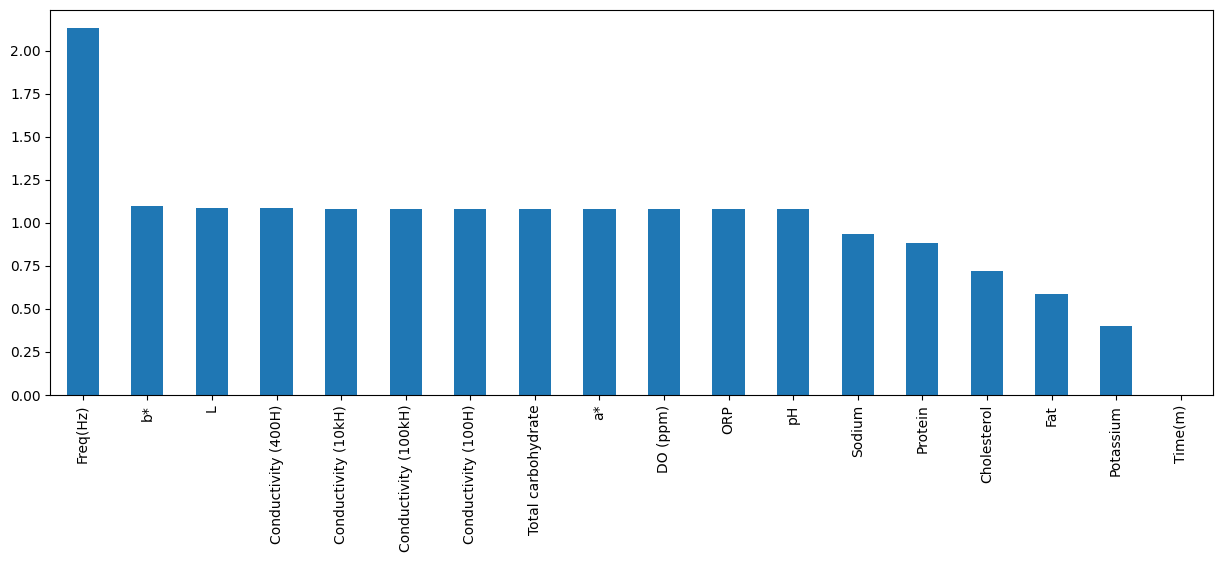

In [59]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(15,5))